<a href="https://colab.research.google.com/github/shukla891/AI-ML-projects/blob/main/Heart_attack_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parameters**
1. age of patient
2. sex: 1= male and 0=female
3. cp: form of heart failure
4. trtbps: person's resting blood pressure
5. chol: cholestrol
6. fbs: fasting blood sugar(>120,1=true,0=false)
7.restecg: resting electrocardiographic result
8.thalachh: maximum heartrate
9.exng: exercise induced angina(1=pain,0=not pain)
10.oldpeak: ST depression induced by exercise relative to rest
11.slp:the slope of the peak exercise ST segment
12.caa:number of major vessels (0-3) colored by flourosopy
13.thall: inherited blood disorder that causes your body to have less hemoglobin than normal

**Output**:
1=high risk of heart attack
, 0=very lower risk of heart attack

**Importig libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [ ]:
dataset=pd.read_csv('heart.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

**Visualizing data**

In [ ]:
df=pd.DataFrame(dataset)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

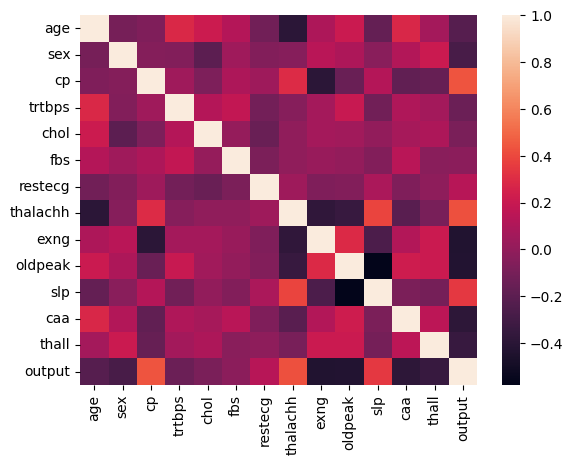

In [ ]:
sns.heatmap(df.corr())

<Axes: title={'center': 'Age of patient'}, xlabel='age', ylabel='count'>

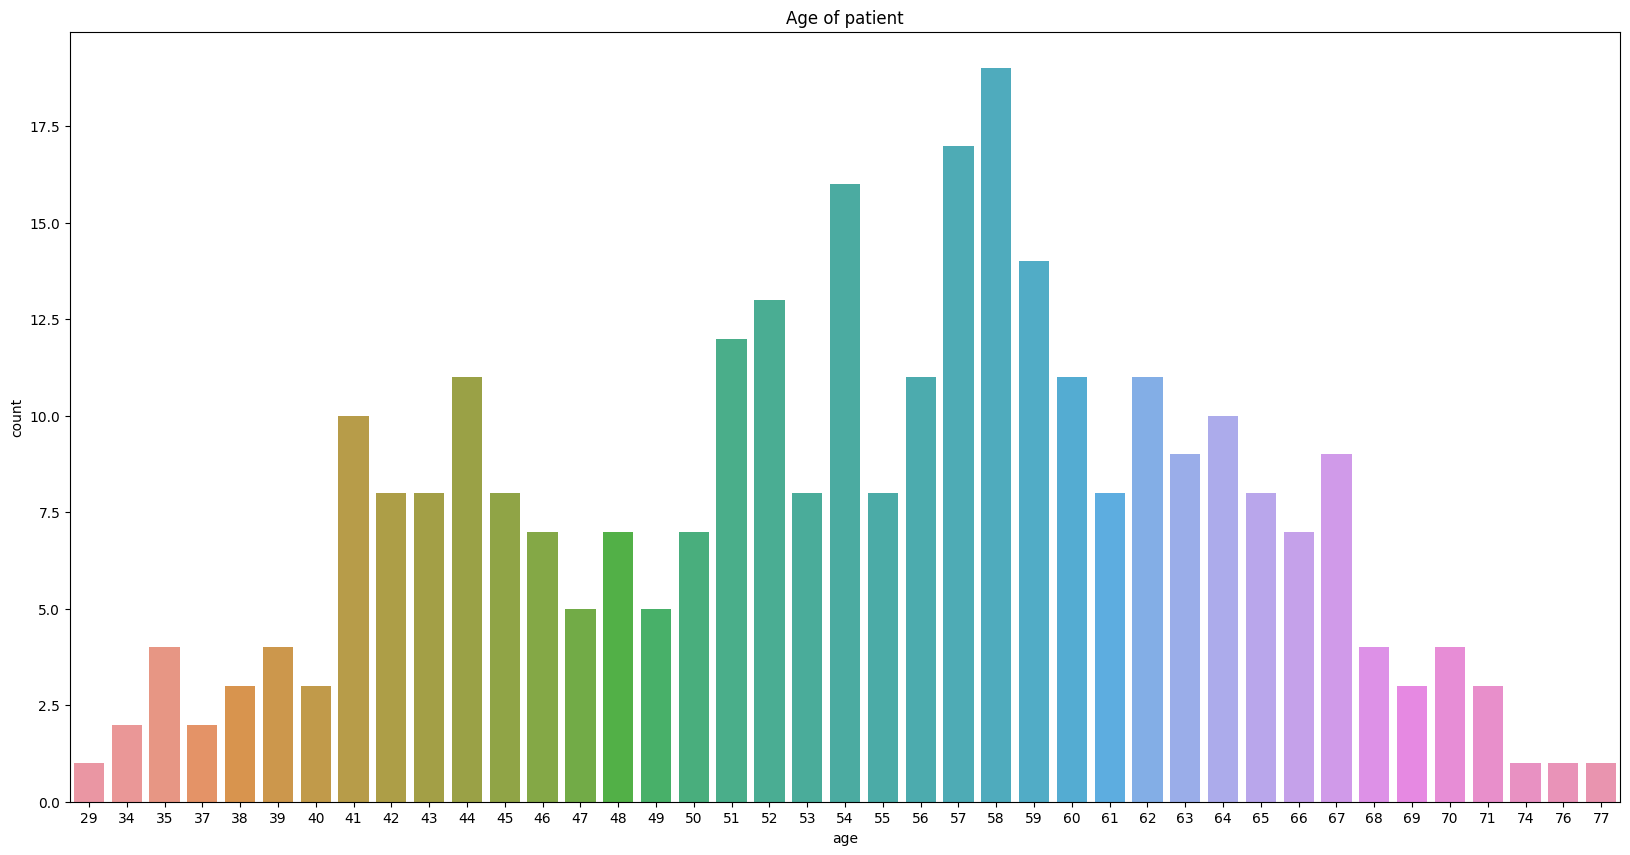

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Age of patient")
plt.xlabel('Age')
sns.countplot(x='age',data=df)

<Axes: title={'center': 'Sex of patient: 0=female, 1=male'}, xlabel='sex', ylabel='count'>

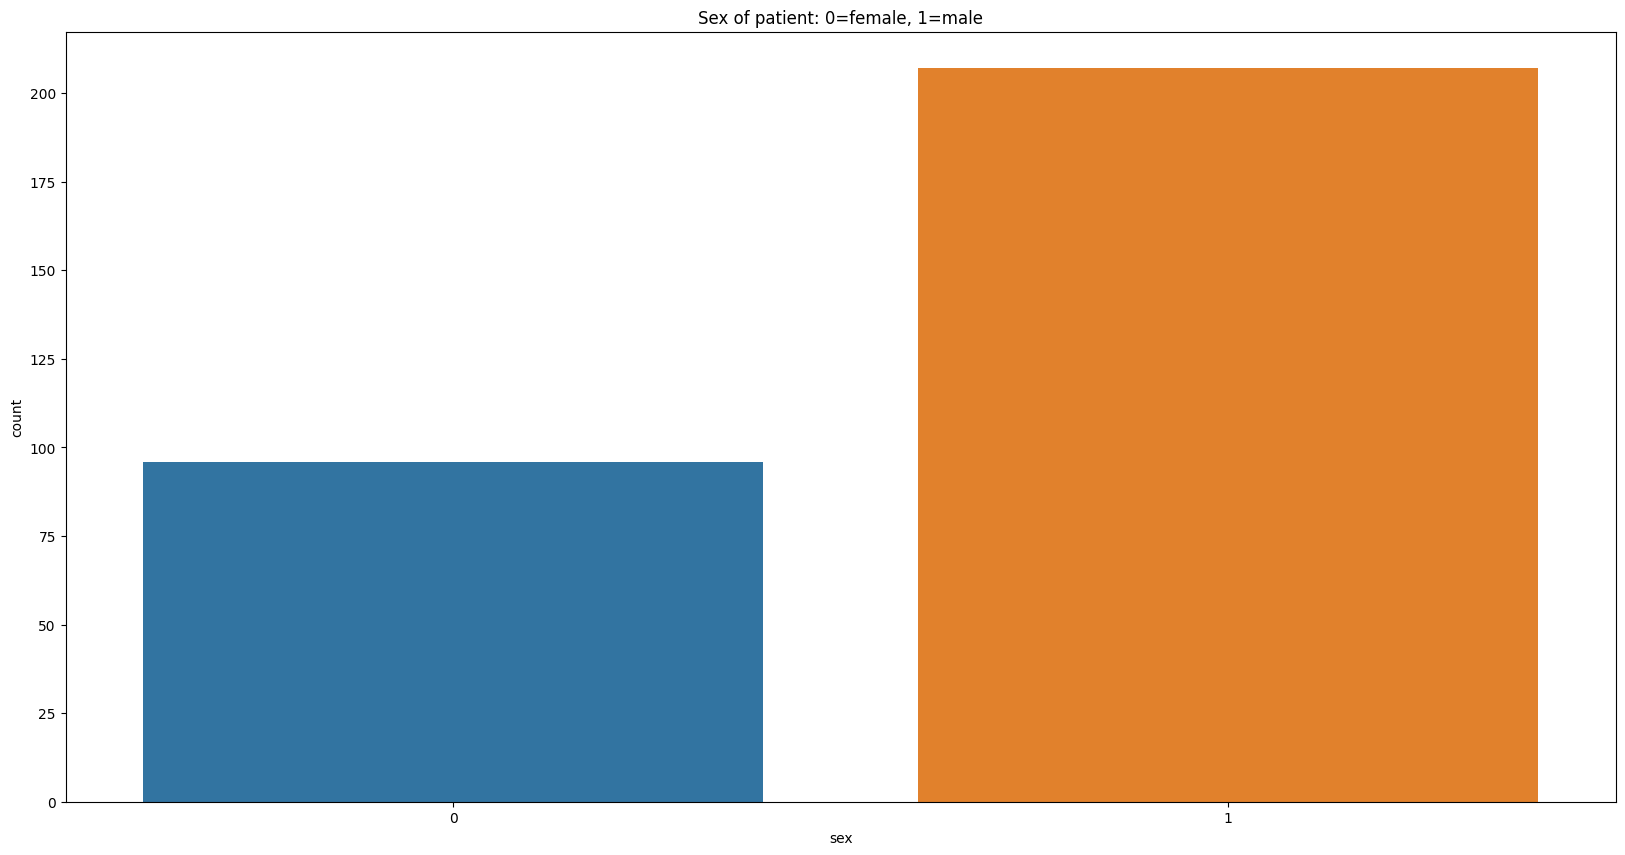

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Sex of patient: 0=female, 1=male")
plt.xlabel('Sex')
sns.countplot(x='sex',data=df)

In [ ]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data

,index,cp
0,Typical Anigma,143
1,Atyppical Anigma,87
2,non-anginal,50
3,asymptomatic,23


<Axes: title={'center': 'Chest Pain of Patients'}, xlabel='index', ylabel='cp'>

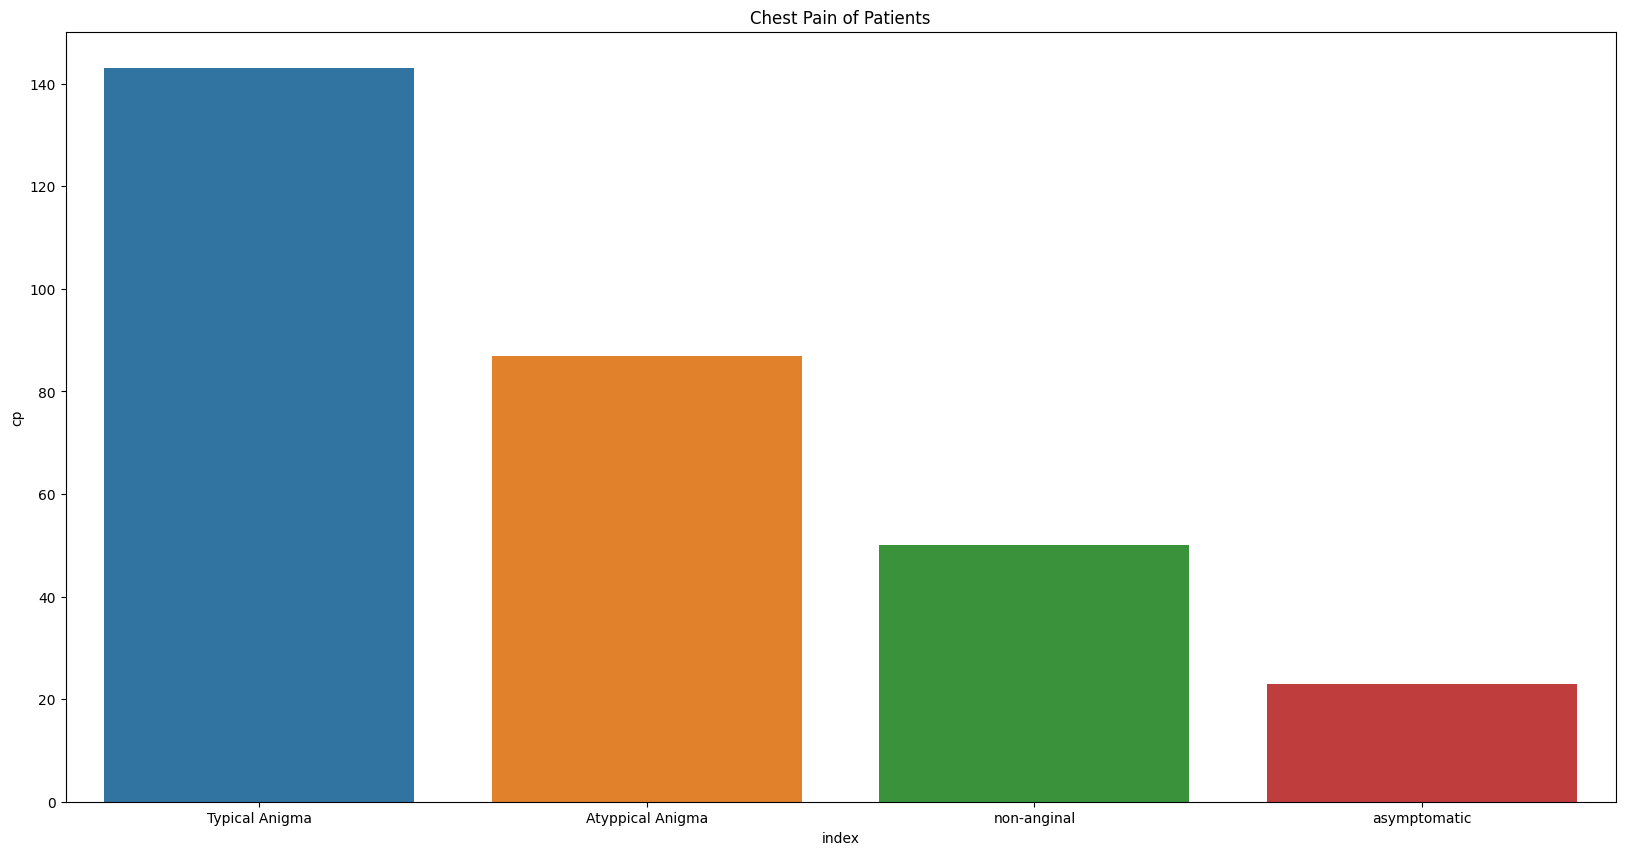

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])

In [ ]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

,index,restecg
0,normal,152
1,having ST-T wave abnormality,147
2,showing probable or definite left ventricular ...,4


<Axes: title={'center': 'ECG data of Patients'}, xlabel='index', ylabel='restecg'>

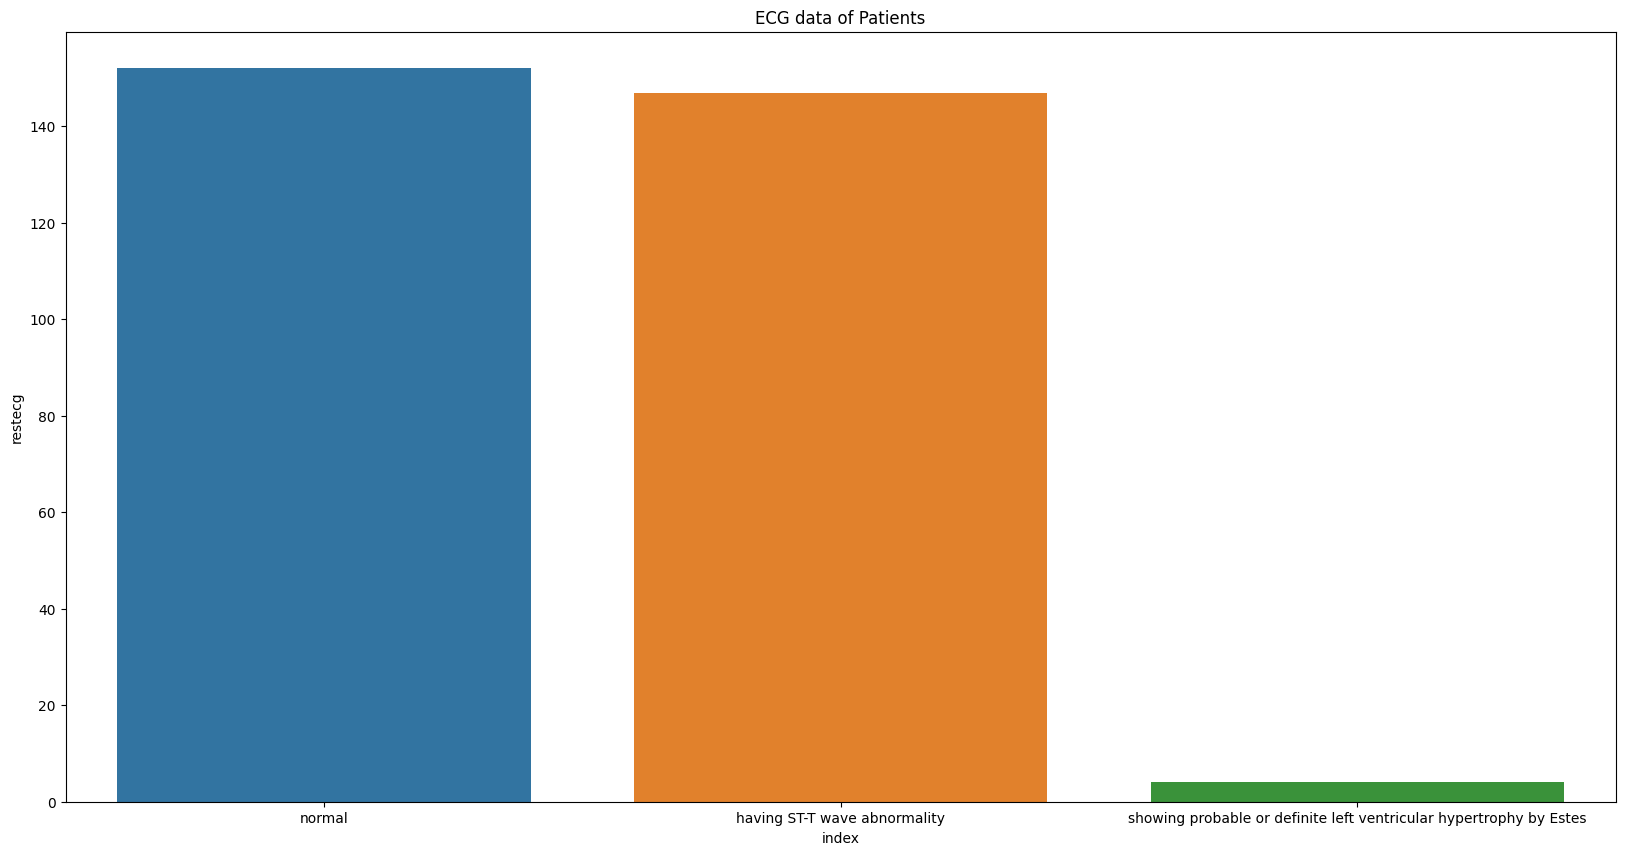

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])

In [ ]:
#sns.pairplot(df,hue='output')

<ipython-input-141-17a8725cb836>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color = 'magenta')
<ipython-input-141-17a8725cb836>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], kde=True, color = 'teal')


Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

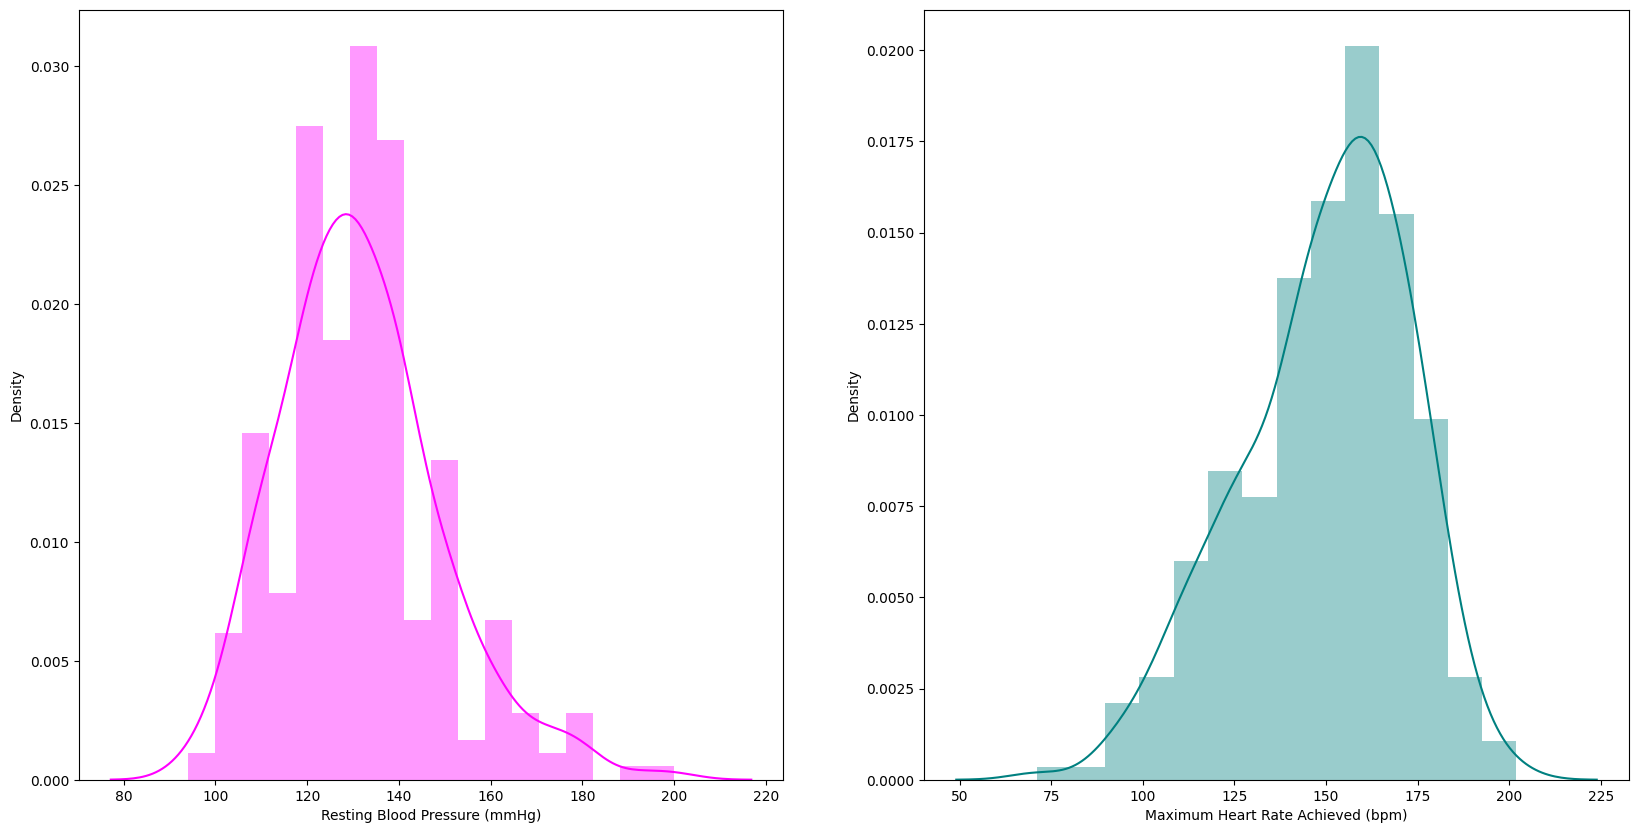

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

<ipython-input-142-ae28c6a04b81>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'],  kde=True,color = 'red')


Text(0.5, 0, 'Cholestrol')

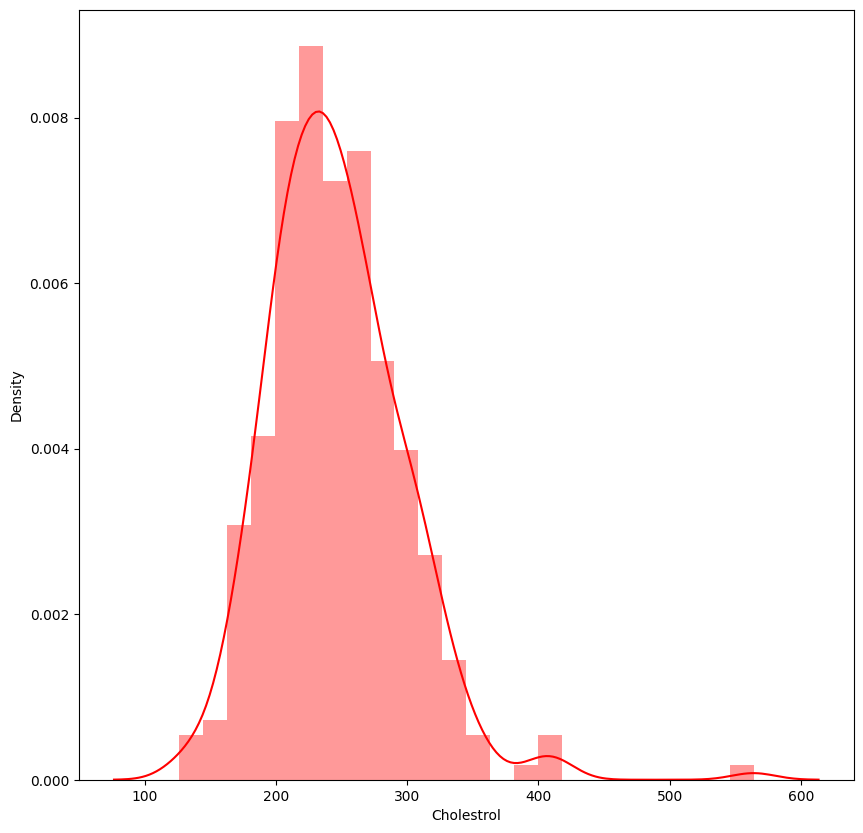

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'],  kde=True,color = 'red')
plt.xlabel("Cholestrol")

**Splitting dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Building ANN**

In [ ]:
import tensorflow as tf
ann=tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.6))
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.6))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

**Training the ANN**

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)

In [ ]:
# the PATIENCE is set to five epochs, which means the training will terminate only if there is
# no improvement in the monitor performance measure for five epochs in a row.
#ann.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

In [ ]:
#pd.DataFrame(ann.history.history).plot()


In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

<Axes: >

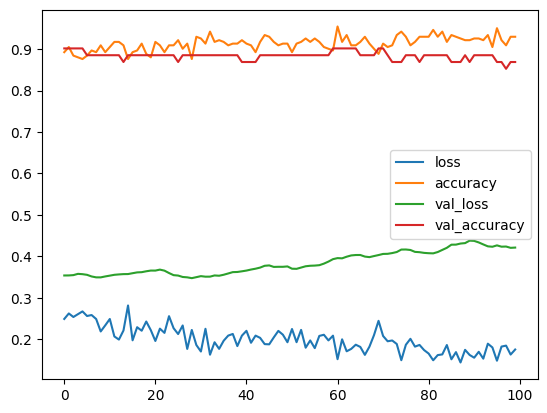

In [ ]:
pd.DataFrame(ann.history.history).plot()

In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',verbose=1,patience=5,min_delta=0)
ann.fit(x_train,y_train,batch_size=32,epochs=1000,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.1549 - accuracy: 0.9298 - val_loss: 0.4245 - val_accuracy: 0.8689
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1688 - accuracy: 0.9215 - val_loss: 0.4265 - val_accuracy: 0.8689
Epoch 3/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.1491 - accuracy: 0.9421 - val_loss: 0.4276 - val_accuracy: 0.8525
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.1737 - accuracy: 0.9215 - val_loss: 0.4247 - val_accuracy: 0.8525
Epoch 5/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.1782 - accuracy: 0.9256 - val_loss: 0.4197 - val_accuracy: 0.8525
Epoch 6/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.1619 - accuracy: 0.9339 - val_loss: 0.4218 - val_accuracy: 0.8525
Epoch 7/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1340 - accuracy: 0.9628 - val_loss: 0.4313 - val_accuracy: 0.8525
Epoch 8/1000


Text(0.5, 0, 'epochs')

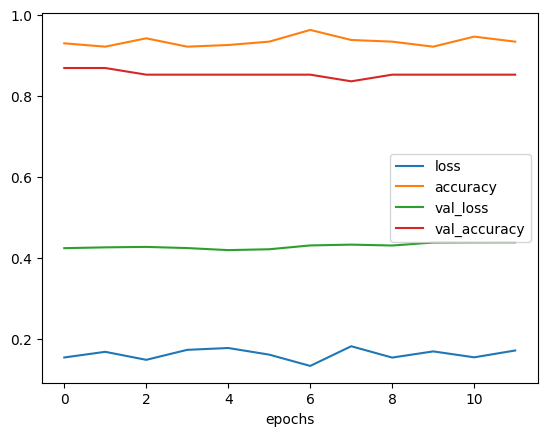

In [ ]:
pd.DataFrame(ann.history.history).plot()
plt.xlabel('epochs')

In [ ]:
y_pred_train=ann.predict(x_train)
y_pred_train=(y_pred_train>0.5)
#print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1),y_train.reshape(len(y_train),1)),1))

8/8 [==============================] - 0s 2ms/step


In [ ]:
y_pred_test=ann.predict(x_test)
y_pred_test=(y_pred_test>0.5)
#print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

2/2 [==============================] - 0s 4ms/step


**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(y_train,y_pred_train)
print(cm1)
accuracy_score(y_train,y_pred_train)

[[107   4]
 [  2 129]]


0.9752066115702479

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
accuracy_score(y_test,y_pred_test)

[[22  5]
 [ 4 30]]


0.8524590163934426